In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/Chocolate Sales.csv")

In [3]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [5]:
def str_to_int(amount):
    res1 = amount.replace("$", "")
    res2 = res1.replace(",", "")
    res3 = res2.replace(" ", "")
    
    return int(res3)

In [7]:
df['amount_int'] = df['Amount'].apply(str_to_int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
 6   amount_int     1094 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 60.0+ KB


In [9]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,amount_int
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180,5320
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94,7896
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91,4501
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342,12726
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184,13685


In [10]:
df['amount_int'].mean()

5652.308043875685

In [11]:
df['amount_int'].median()

4868.5

In [12]:
df['amount_int'].mode()

0    2317
Name: amount_int, dtype: int64

In [14]:
df['amount_int'].std(ddof=1)

4102.44201405366

In [15]:
df['amount_int'].std(ddof=0)

4100.566611892091

In [16]:
len(df)

1094

In [17]:
df['amount_int'].quantile(0.25)

2390.5

In [18]:
df['amount_int'].quantile(0.5)

4868.5

In [19]:
df['amount_int'].quantile(0.75)

8027.25

In [22]:
Q1 = df['amount_int'].quantile(0.25)
Q2 = df['amount_int'].quantile(0.5)
Q3 = df['amount_int'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

df2 = df[(df['amount_int'] < lower_bound)]
df3 = df[(df['amount_int'] > upper_bound)]

In [34]:
upper_bound

16482.375

In [23]:
df2.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,amount_int


In [24]:
df3.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,amount_int
57,Brien Boise,Canada,99% Dark & Pure,18-May-22,"$16,793",416,16793
66,Van Tuxwell,Australia,Organic Choco Syrup,10-Aug-22,"$19,453",14,19453
119,Kelci Walkden,USA,Manuka Honey Choco,16-Feb-22,"$17,318",87,17318
135,Van Tuxwell,India,Organic Choco Syrup,16-May-22,"$19,929",174,19929
212,Marney O'Breen,UK,Smooth Sliky Salty,13-May-22,"$18,991",88,18991


In [25]:
import matplotlib.pyplot as plt

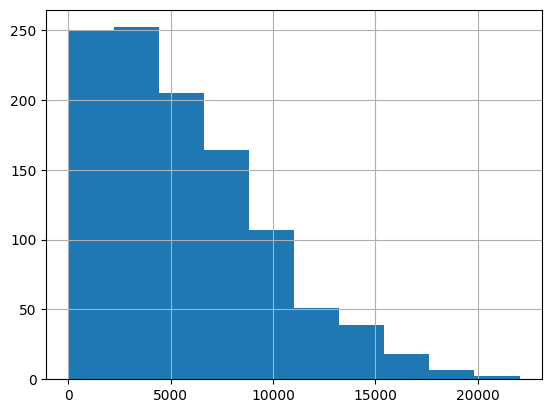

In [26]:
plt.hist(df['amount_int'])
plt.grid()
plt.show()

In [32]:
df5 = df.sort_values(by='Date', ascending=True)

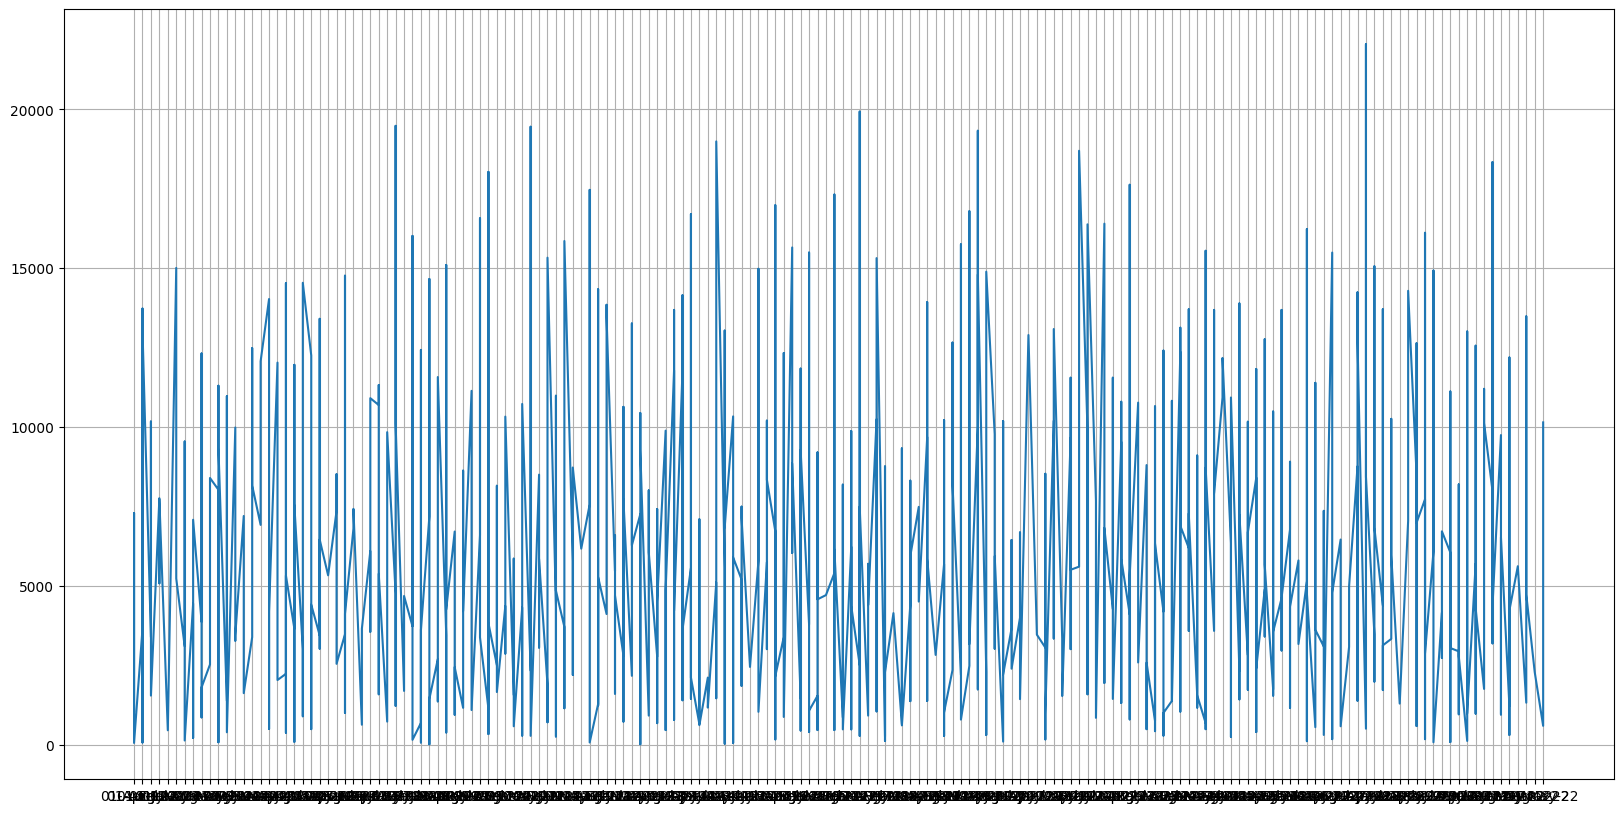

In [33]:
plt.figure(figsize=(20, 10))
plt.plot(df5['Date'], df5['amount_int'])
plt.grid()

{'whiskers': [<matplotlib.lines.Line2D at 0x137d23220>,
 'caps': [<matplotlib.lines.Line2D at 0x137d239d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x137d23550>],
 'medians': [<matplotlib.lines.Line2D at 0x137d487f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x137d48400>],
 'means': []}

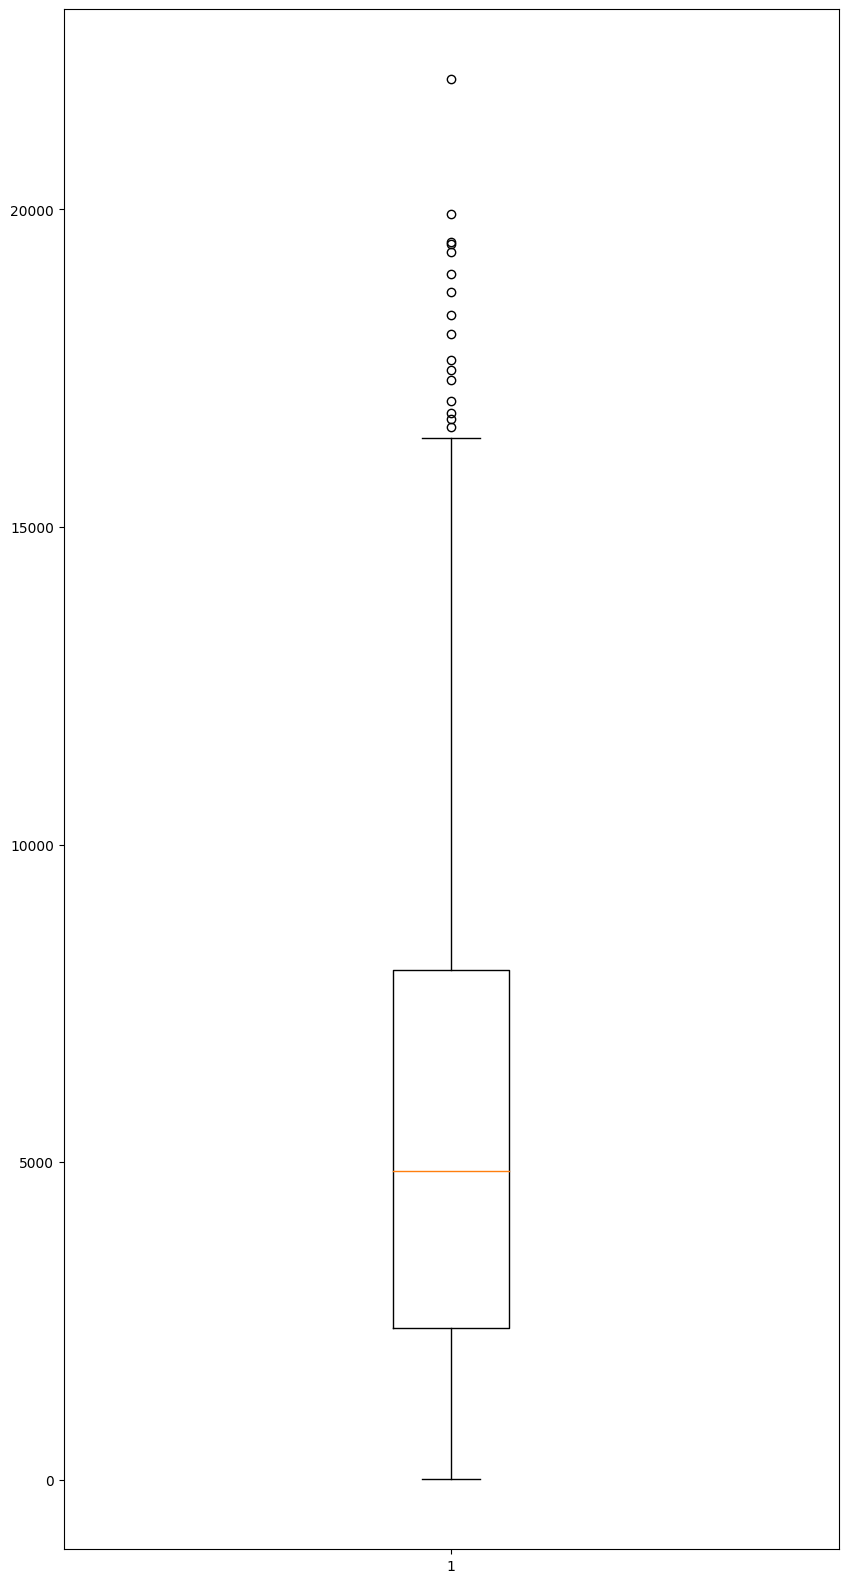

In [36]:
plt.figure(figsize=(10, 20))
plt.boxplot(df['amount_int'])
